In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fast')

import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS
import random
import textwrap

## Dropped rows (with null):
> • Precipitation(in) (1998358)<br>• End_Lat (2246264)<br>• End_Lng (2246264)<br>• Number (1917605)<br>• Wind_Chill(F) (1852623)<br>• Airport_Code (5691)<br>• Pressure(in) (48142)<br>• Wind_Direction (45101)<br>• Timezone (3163)

---
## Dropped rows (no null):
> • ID<br>• Source<br>• Country<br>• Street (157,947 street names)<br>• Turning_Loop (because all False)

In [2]:
df = pd.read_csv('data/3-accidents-dummies-next.csv')

In [3]:
df.shape

(2898031, 33)

In [4]:
df.drop('Unnamed: 0', 1, inplace=True)

In [5]:
df.head()

,TMC,Severity,Start_Time,End_Time,Distance(mi),Side,City,County,State,Zipcode,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,R,Dayton,Montgomery,OH,45424,...,0,0,0,0,0,0,0,0,0,0
1,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,L,Reynoldsburg,Franklin,OH,43068,...,0,0,0,0,0,0,0,0,0,1
2,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,0.01,R,Williamsburg,Clermont,OH,45176,...,0,0,0,0,0,1,0,0,1,1
3,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,0.01,R,Dayton,Montgomery,OH,45417,...,0,0,0,0,0,0,0,1,1,1
4,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,0.01,R,Dayton,Montgomery,OH,45459,...,0,0,0,0,0,1,1,1,1,1


In [6]:
state_df = df.State.value_counts().to_frame()

In [7]:
state_df.reset_index(inplace=True)

In [8]:
state_df

,index,State
0,CA,645967
1,TX,290931
2,FL,219740
3,SC,143349
4,NC,141354
5,NY,136107
6,PA,88866
7,MI,88390
8,IL,86056
9,GA,82215


In [9]:
state_df.rename(columns={'index': 'State', 'State':'Frequency'}, inplace=True)

In [10]:
state_df.sort_values(by='State', inplace=True)

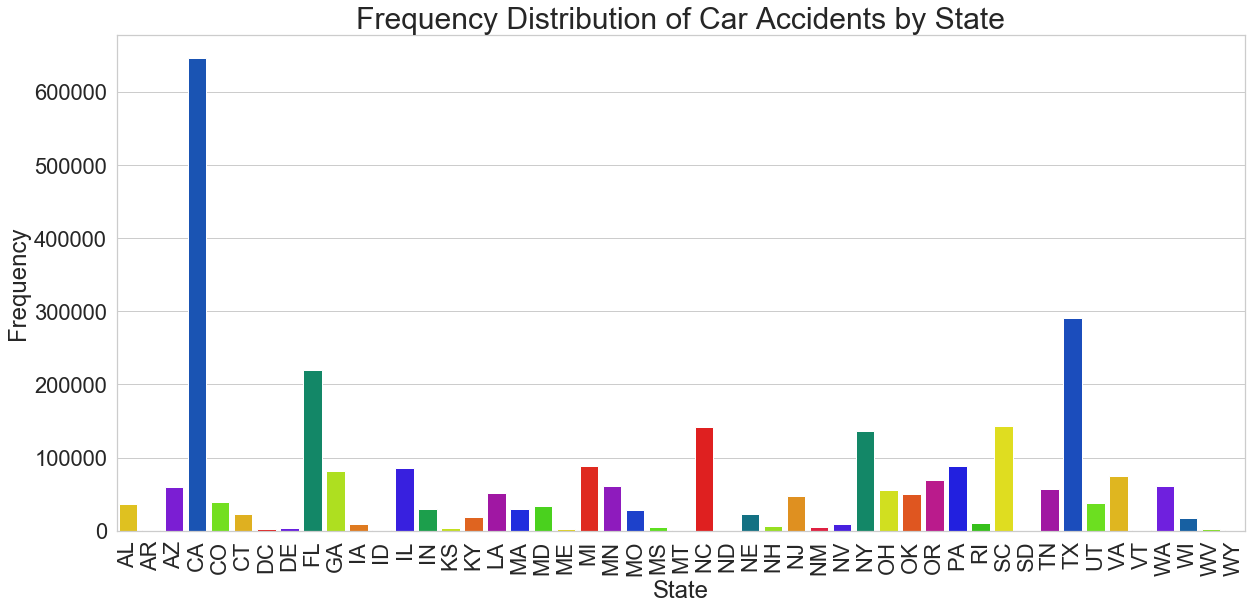

In [11]:
sns.set(style='whitegrid',
        palette='CMRmap',
        font_scale=2, 
        color_codes=True)

fig, ax = plt.subplots(figsize=(18,9))
ax = sns.barplot('State', y='Frequency',
                data=state_df,
                palette='prism_r')
ax.set_xticklabels(ax.get_xticklabels(),
                  rotation=90)
ax.set_title('Frequency Distribution of Car Accidents by State',
            fontsize=30)
plt.tight_layout()
plt.savefig('img/Frequency_dist_by_state.jpg')

In [12]:
city_df = df.City.value_counts().to_frame()

In [13]:
city_df.reset_index(inplace=True)

In [14]:
city_df.rename(columns={'index': 'City', 'City': 'Count'}, inplace=True)

In [15]:
city_df

,City,Count
0,Houston,91003
1,Charlotte,67872
2,Los Angeles,65400
3,Austin,58027
4,Dallas,57688
...,...,...
11502,Watford City,1
11503,Huguenot,1
11504,Tarawa Terrace,1
11505,Meeteetse,1


In [16]:
(91003/2898031) * 300

9.420499642688432

In [17]:
total_acc = np.sum(city_df.Count)

In [18]:
total_acc

2898031

In [19]:
city_df.Count.values

array([91003, 67872, 65400, ...,     1,     1,     1])

In [20]:
city_df['City'] = city_df['City'].str.replace(' ', '_')

In [21]:
city_df.sample(10)

,City,Count
4354,Meredith,31
9019,King,3
8035,Priest_River,4
5023,Peotone,21
9178,Birchwood,3
8334,Northeast_Jefferson,4
8637,Barco,3
6607,Glenolden,9
11273,Nemaha,1
8030,Romeo,4


In [22]:
just_string = ''
for city, count in zip(city_df.City.values, city_df.Count.values):
        weight = int((count/total_acc) * 1000)
        word = (city + ' ') * weight
        just_string += word

just_string

'Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dalla

In [23]:
stopwords = set(STOPWORDS)

In [24]:
city_cloud = WordCloud(background_color='black', 
                       max_font_size=50,
                      max_words=2500,
                      collocations=False,
                      stopwords=stopwords)

city_cloud.generate(just_string)

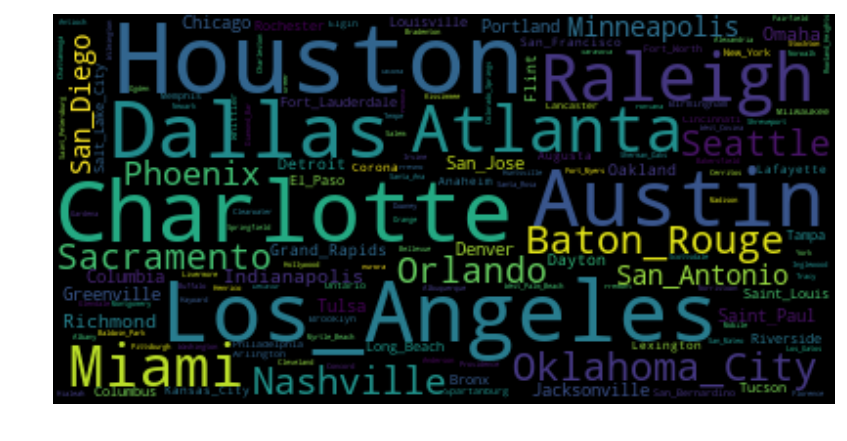

In [25]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(city_cloud, interpolation='bilinear')
plt.axis('off')
# plt.figure(figsize=(12,7))

plt.show()

In [26]:
city_df

,City,Count
0,Houston,91003
1,Charlotte,67872
2,Los_Angeles,65400
3,Austin,58027
4,Dallas,57688
...,...,...
11502,Watford_City,1
11503,Huguenot,1
11504,Tarawa_Terrace,1
11505,Meeteetse,1


In [27]:
df['Side'] = df['Side'].map({'R': 0, 'L': 1, '': 0})

In [28]:
df['Side'].ffill(axis=0, inplace=True)

In [29]:
df['Side'] = df['Side'].astype(int)

In [30]:
df.Side.value_counts()

0    2374354
1     523677
Name: Side, dtype: int64

In [31]:
df.End_Time

0          2016-02-08 11:00:00
1          2016-02-08 06:37:59
2          2016-02-08 07:19:27
3          2016-02-08 07:53:34
4          2016-02-08 08:09:07
                  ...         
2898026    2019-08-23 18:32:01
2898027    2019-08-23 19:38:23
2898028    2019-08-23 19:28:49
2898029    2019-08-23 19:29:42
2898030    2019-08-23 19:21:31
Name: End_Time, Length: 2898031, dtype: object

In [32]:
from pandas import Timestamp

In [33]:
df['Day-of-Week'] = df['End_Time'].apply(lambda x: pd.Timestamp(x))

In [34]:
df['Day_of_Week']=df['Day-of-Week'].apply(lambda x: x.dayofweek)

In [35]:
df.Day_of_Week.value_counts()

1    529675
2    524408
4    522322
3    513575
0    487435
5    173031
6    147585
Name: Day_of_Week, dtype: int64

In [36]:
df.drop('Day-of-Week', 1, inplace=True)

In [37]:
df['Name_of_Day'] = df['Day_of_Week'].map({0:'Monday', 
                                           1:'Tuesday', 
                                           2:'Wednesday', 
                                           3:'Thursday', 
                                           4:'Friday', 
                                           5:'Saturday', 
                                           6:'Sunday'})

In [38]:
df_week = df.Name_of_Day.value_counts().to_frame()

In [39]:
df_week.reset_index(inplace=True)

In [40]:
df_week

,index,Name_of_Day
0,Tuesday,529675
1,Wednesday,524408
2,Friday,522322
3,Thursday,513575
4,Monday,487435
5,Saturday,173031
6,Sunday,147585


In [41]:
df_week.rename(columns={'index': 'Day_of_Week', 'Name_of_Day': 'Count'}, inplace=True)

In [42]:
df_week

,Day_of_Week,Count
0,Tuesday,529675
1,Wednesday,524408
2,Friday,522322
3,Thursday,513575
4,Monday,487435
5,Saturday,173031
6,Sunday,147585


In [43]:
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

In [44]:
df_week

,Day_of_Week,Count
0,Tuesday,529675
1,Wednesday,524408
2,Friday,522322
3,Thursday,513575
4,Monday,487435
5,Saturday,173031
6,Sunday,147585


In [45]:
crashes_count = [147585, 487435, 529675,524408,513575,522322,173031]

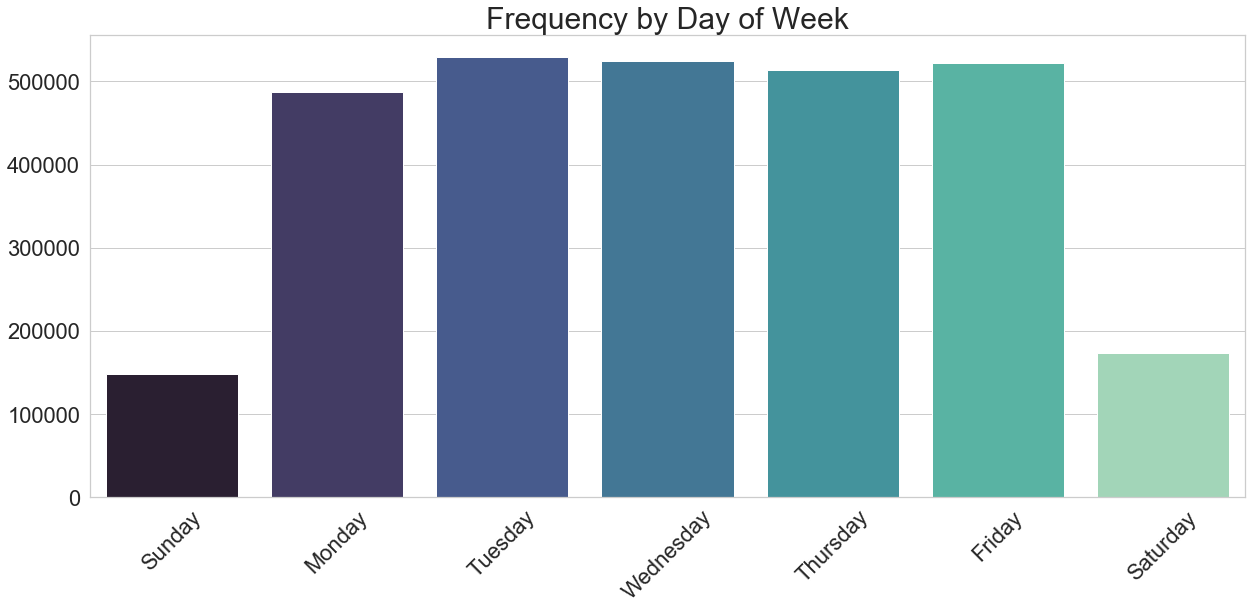

In [46]:
sns.set(style='whitegrid',
        palette='CMRmap',
        font_scale=2, 
        color_codes=True)

fig, ax = plt.subplots(figsize=(18,9))
ax = sns.barplot(days, crashes_count,
                data=df_week,
                palette='mako')
ax.set_xticklabels(ax.get_xticklabels(),
                  rotation=45)
ax.set_title('Frequency by Day of Week',
            fontsize=30)
plt.tight_layout()
plt.savefig('img/dayofweek.jpg')

In [47]:
df.shape

(2898031, 34)

In [54]:
city_df.shape

(11507, 2)

In [55]:
top20 = city_df.head(20)

In [57]:
top20['City'] = top20['City'].str.replace('_', ' ')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
top20['City'].values

array(['Houston', 'Charlotte', 'Los Angeles', 'Austin', 'Dallas',
       'Raleigh', 'Atlanta', 'Miami', 'Oklahoma City', 'Baton Rouge',
       'Nashville', 'Orlando', 'Sacramento', 'Seattle', 'Phoenix',
       'Minneapolis', 'San Antonio', 'San Diego', 'Indianapolis',
       'Richmond'], dtype=object)

In [59]:
top20.index

RangeIndex(start=0, stop=20, step=1)

In [61]:
df.columns

Index(['TMC', 'Severity', 'Start_Time', 'End_Time', 'Distance(mi)', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Weather_Timestamp',
       'Temperature', 'Humidity_pct', 'Visibility_mi', 'Windspeed_mph',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight', 'Day_of_Week',
       'Name_of_Day'],
      dtype='object')

In [62]:
city_area = df[['City', 'Visibility_mi', 'Severity']]

In [103]:
city_area['Severity'] = df['Severity']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [104]:
city_area

,End_Time,City,Visibility_mi,Severity
0,2016-02-08 11:00:00,Dayton,10.0,3
1,2016-02-08 06:37:59,Reynoldsburg,10.0,2
2,2016-02-08 07:19:27,Williamsburg,10.0,2
3,2016-02-08 07:53:34,Dayton,9.0,3
4,2016-02-08 08:09:07,Dayton,6.0,2
...,...,...,...,...
2898026,2019-08-23 18:32:01,Riverside,10.0,2
2898027,2019-08-23 19:38:23,San Diego,10.0,2
2898028,2019-08-23 19:28:49,Orange,10.0,2
2898029,2019-08-23 19:29:42,Culver City,10.0,2


In [109]:
top20

,City,Count
0,Houston,91003
1,Charlotte,67872
2,Los Angeles,65400
3,Austin,58027
4,Dallas,57688
5,Raleigh,39550
6,Atlanta,37410
7,Miami,30881
8,Oklahoma City,30682
9,Baton Rouge,30151


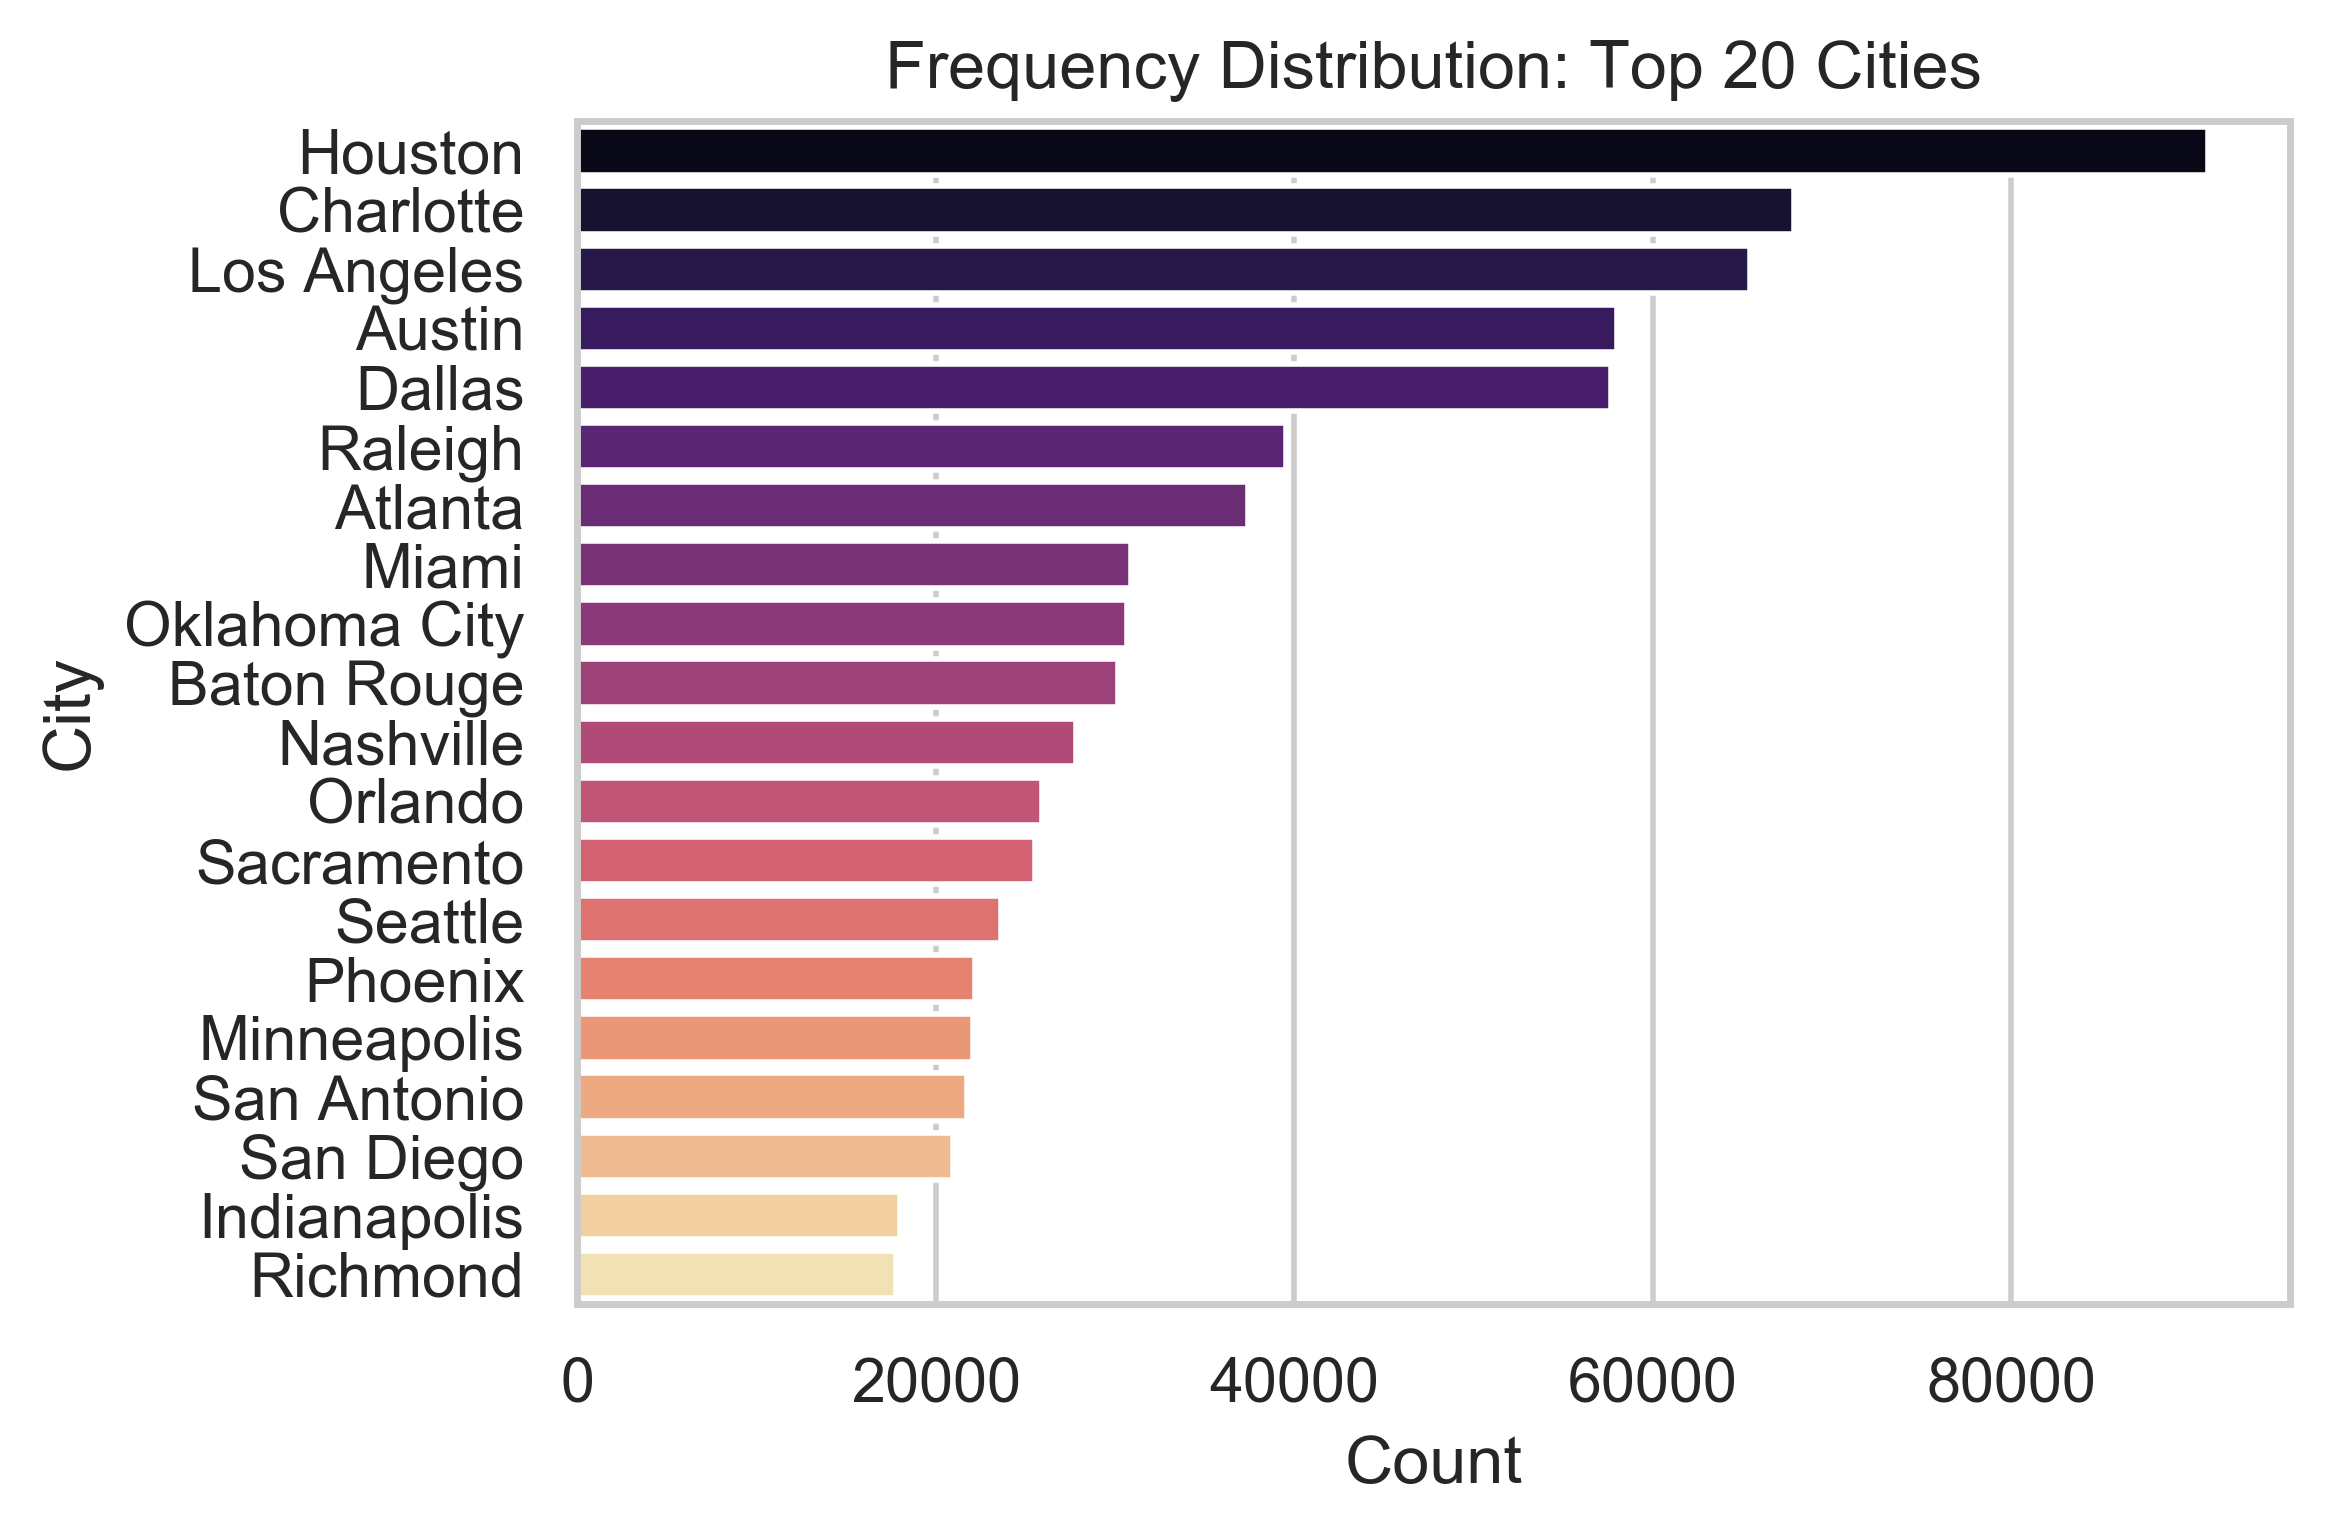

In [143]:
sns.set(style='whitegrid')

fig, ax = plt.subplots()

ax = sns.barplot(x='Count',
           y='City',
           data=top20,
           label='Frequency Distribution: Top 20 Cities',
           palette='magma')
ax.set_title('Frequency Distribution: Top 20 Cities')
plt.tight_layout()
plt.savefig('img/topbar.jpg')